ChEn-5310: Computational Continuum Transport Phenomena Spring 2021 UMass Lowell; Prof. V. F. de Almeida **25Jan21**

# 01. Introduction
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

---

## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
* [Least-Squares Residual w/ Fourier Basis Functions](#lsq)
  - [Collocation Points](#colpts)
  - [Linear Combination of Basis Functions](#lincomb)
  - [Least-Squares of Residual](#lsqcalc)
  - [Results](#res)
---

## [Objectives](#toc)<a id="obj"></a>

 + Introductory comments on variational forms and basis functions.
 + Elementary use of basis functions to approximate a given function: linear least-squares method
 + Elementary description of a least-squares Galerkin spectral element method to solve 1-D Poisson problem.
 + [Handwritten notes in OneNote](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EiT9S8dWWQ5LuvalDfeDuOoBs-_tgLPFR83xU6WumdI9xg?e=fQXd40).

## [Least-Squares Residual w/ Fourier Basis Functions](#toc)<a id="lsq"></a>

Given a *well-behaved* function $f:\Reals\rightarrow\Reals$ how can we systematically compute an approximant $g:\Reals\rightarrow\Reals$? Why would anyone care about this? The ability to approximate a given $f$ helps build methods to approximate $f$ when it is not explicitly given but sought as the solution of a mathematical problem such as an ODE or PDE.

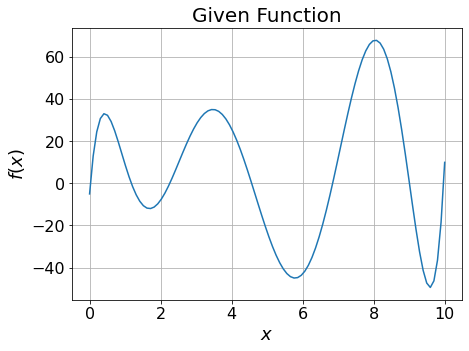

In [14]:
'''Generate a smooth function f'''

try:    
    from engy_5310.toolkit import Function   
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

control_pts = [(0,-5),(1,9),(2,-8),(3,28),(5,-23),(7,12),(9,1),(10,10)]

f = Function(control_pts, type='poly')
  
def plot(f, g=None, control_pts=False):
    
    x = np.linspace(f.control_pts[0][0], f.control_pts[-1][0], 100)
    y = f.values(x)
    
    plt.figure(1, figsize=(7, 5))

    plt.plot(x,y)
    
    if control_pts:
        plt.plot([p[0] for p in control_pts], [p[1] for p in control_pts],'r*',label='control points')
    
    if g:
        plt.plot(g[0],g[1],'--r')
    
    plt.xlabel(r'$x$',fontsize=18)
    plt.ylabel(r'$f(x)$',fontsize=18)
    
    if g:
        plt.title('Function Comparison', fontsize=20)
    else:
        plt.title('Given Function',fontsize=20)
        
    if control_pts:
        plt.legend(loc='best',fontsize=12)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    plt.show()
    
plot(f)

### [Collocation Points](#toc)<a id="colpts"></a>

If $g$ is obtainable, how would we compare to $f$? On the whole $\Reals$? This prompts the simple idea of computing $g$ to approximate $f$ on a selected number of points in $\Reals$. Hence, let's select a number of *collocation* points: $\{x_i \mid i=1,\ldots,m\}$. Now we can ask a more definite question. How do we make $g$ and $f$ to be very close when evaluated at the collocation points? Ideally if $m\rightarrow\infty$ then $f\approx g$ to a good extent.

In [15]:
'''Collocation points'''

min_x = 0
max_x = 10
m = 100

collocation_pts = np.linspace(min_x, max_x, m)

### [Linear Combination of Basis Functions](#toc)<a id="lincomb"></a>

A powerful method used to compute an approximant $g$ can be built using a simple structure of a basis function set, for example

\begin{equation*}
   V := \{\cos(k\,\mu\,x), \,\sin(k\,\mu\,x)\, \mid \, k=0,\ldots,N\}.
\end{equation*}

This will be referred to as a Fourier basis function set. An approximant $g$ can be sougth as a **linear combination** of nonlinear functions:

\begin{equation*}
 g(x) := \sum\limits_{k=0}^N \alpha_k\,\cos(k\,\mu\,x) + \beta_k\,\sin(k\,\mu\,x) \quad\  \forall \quad\ x\in\Reals.
\end{equation*}

Here there are $n=2N+1$ real coefficients $\alpha_k$ and $\beta_k$, and $\mu$ is the wavenumber. For future reference the vector of coefficients $\cvec \in \Reals^n$, is defined as follows:  $\cvec = \begin{pmatrix}
 \alpha_0 \\ 
 \alpha_1 \\ 
 \beta_1  \\ 
 \vdots \\
 \alpha_N \\ 
 \beta_N \\
\end{pmatrix}$. Furthermore the $g$ function is written with the explicit dependence on the coefficients as parameters:

\begin{equation*}
 g(x; \cvec) = \sum\limits_{k=0}^N \alpha_k\,\cos(k\,\mu\,x) + \beta_k\,\sin(k\,\mu\,x) \quad\  \forall \quad\ x\in\Reals.
\end{equation*}

How could we compute the *best* values for these coefficients so that $g(x_i,\cvec)$ and $f(x_i)$ are *sufficiently close* for all $x_i$?

Let's define the vector $\fvec\in\Reals^m$ of values $f_i = f(x_i)$ as 
$\fvec = \begin{pmatrix}
 f(x_1) \\ 
 f(x_2) \\ 
 \vdots  \\ 
 f(x_m) \\ 
\end{pmatrix}$ and similarly the vector-valued function of a vector argument, $\gvec:\Reals^n\rightarrow\Reals^m$, that is,
$\gvec(\cvec) = \begin{pmatrix}
 g(x_1,\cvec) \\ 
 g(x_2,\cvec) \\ 
 \vdots  \\ 
 g(x_m,\cvec) \\ 
\end{pmatrix}$, where $\cvec$ is the vector of coefficients. Note that $\gvec$ is a **linear function** of its argument, that is,

\begin{equation*}
 \boxed{\gvec(\cvec) = \Amtrx\,\cvec},
\end{equation*}

where $\Amtrx$ is a $m\times n$ real matrix, that is:

$\overset{(m \times n)}{\Amtrx} =  \begin{pmatrix}
1 & \cos(\mu\,x_1) & \sin(\mu\,x_1) & \cos(2\mu\,x_1) & \sin(2\mu\,x_1) & \ldots & \cos(N\mu\,x_1) & \sin(N\mu\,x_1)  \\
1 & \cos(\mu\,x_2) & \sin(\mu\,x_2) & \cos(2\mu\,x_2) & \sin(2\mu\,x_2) & \ldots & \cos(N\mu\,x_2) & \sin(N\mu\,x_2)  \\
\vdots  & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & \cos(\mu\,x_m) & \sin(\mu\,x_m) & \cos(2\mu\,x_m) & \sin(2\mu\,x_m) & \ldots & \cos(N\mu\,x_m) & \sin(N\mu\,x_m)  \\
 \end{pmatrix}$.

This important linear relationship is the whole point of using a linear combination of the basis functions as it will be apparent next.

In [16]:
'''Build the approximant linear function'''

import math

wavelength = max_x - min_x
mu = 2*math.pi/wavelength
N = 5 # number of pairs of sine/cosine
assert m > 2*N + 1

try:    
    from engy_5310.toolkit import build_fourier_linear_system   
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'

(a_mtrx, f_vec) = build_fourier_linear_system(mu, N, collocation_pts, f.values(collocation_pts) )

### [Least-Squares of Residual](#toc)<a id="lsqcalc"></a>

It is natural to form the residual function, $\rvec:\Reals^m\rightarrow\Reals^m$ evaluated at $\cvec$, that is, $\rvec(\cvec) := \gvec(\cvec) - \fvec$ and ask the question how to compute $\cvec^*$ so to minimize the magnitude of $\rvec(\cvec^*)$? Arguably the *best* method is to minimize the sum of the squares of the residual vector components,

\begin{equation*}
 \phi(\cvec^*) = \min\limits_\cvec \, \norm{\rvec(\cvec)}^2_2 \quad\  \forall \quad\ \cvec.
\end{equation*}

that is to say, to compute $\cvec^*$ using the least-squares method. To make progress to compute $\cvec^*$, let's rewrite the previous equation as follows

\begin{equation*}
 \phi(\cvec^*) = \min\limits_\cvec \, (\Amtrx\,\cvec-\fvec)\cdot(\Amtrx\,\cvec-\fvec) \quad \forall \quad\ \cvec.
\end{equation*}

We can now impose the optimality condition (directional derivative set to zero in any direction)

\begin{equation*}
 dd_\thetavec \phi(\cvec^*) = 0 \quad \forall \quad \thetavec .
\end{equation*}

This leads to the normal matrix equation

\begin{equation*}
 \Amtrx^\top\Amtrx\,\cvec^* = \Amtrx^\top\,\fvec ,
\end{equation*}

which has a unique solution as long as $\Amtrx$ is full rank.


In [17]:
'''Compute optimal coefficient vector'''

try:    
    from engy_5310.toolkit import solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'

c_vec = solve(a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@f_vec)

### [Results](#toc)<a id="res"></a>

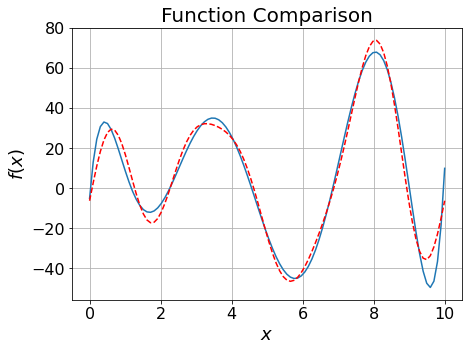

In [18]:
'''Plot comparison of f and g_vec'''

plot_pts = np.linspace(min_x, max_x, 100)

(a_mtrx, _) = build_fourier_linear_system(mu, N, plot_pts, np.zeros(100))

g_vec = a_mtrx @ c_vec

plot(f,(plot_pts,g_vec))

In [20]:
'''Local error'''

x_pts = np.linspace(min_x, max_x, 100)

f_vec = f.values(x_pts)

(a_mtrx, _) = build_fourier_linear_system(mu, N, x_pts, np.zeros(x_pts.size))
g_vec = a_mtrx @ c_vec

shift = False

if shift:
    min_val = min(min(f_vec), min(g_vec))
    v_shift = min_val
    f_vec += abs(v_shift+1)
    g_vec += abs(v_shift+1)

print('mean local rel error [%] = ', np.mean(abs((g_vec-f_vec)/f_vec*100.0)))
print('std local rel error [%] = ', np.std(abs((g_vec-f_vec)/f_vec*100.0)))
print('max local rel error [%] = ', np.max(abs((g_vec-f_vec)/f_vec*100.0)))
print('min local rel error [%] = ', np.min(abs((g_vec-f_vec)/f_vec*100.0)))

mean local rel error [%] =  35.849255580327984
std local rel error [%] =  65.40876578381501
max local rel error [%] =  391.0287706235176
min local rel error [%] =  0.4022134309582486


In [21]:
'''Integral error'''

from scipy.integrate import quad

def f_integrand(x):
    return f.values(np.array(x))
def g_integrand(x):
    (a_mtrx, _) = build_fourier_linear_system(mu, N, np.array(x), np.zeros(1))
    g_vec = a_mtrx @ c_vec
    return g_vec

f_integral = quad(f_integrand, 0, 10)
print('Area under f =', f_integral)

g_integral = quad(g_integrand, 0, 10)
print('Area under g =', g_integral)

print('rel error [%] = ', (g_integral[0]-f_integral[0])/f_integral[0]*100)

Area under f = (62.892421801764414, 3.071097998284289e-12)
Area under g = (63.87460977470314, 2.9609909063014962e-12)
rel error [%] =  1.561695264390614
